# Marketing Funnel & Conversion Performance Analysis

This project analyzes a marketing campaign funnel to understand how customers move from initial contact to final conversion.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
df = pd.read_csv("bank.csv", sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Dataset Overview

The dataset contains customer information, campaign details, and a target variable indicating whether a customer subscribed to the product.


In [20]:
df.shape


(4521, 17)

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [21]:
df['y'].value_counts()


y
no     4000
yes     521
Name: count, dtype: int64

In [22]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [23]:
df['y'].value_counts()


y
0    4000
1     521
Name: count, dtype: int64

## Marketing Funnel Definition

- **Stage 1: Total Contacts**  
  All customers contacted during the marketing campaign.

- **Stage 2: Interested Leads**  
  Customers who had a successful outcome in previous campaigns.

- **Stage 3: Converted Customers**  
  Customers who subscribed to the product.


In [24]:
total_contacts = len(df)
interested_leads = df[df['poutcome'] == 'success'].shape[0]
converted_customers = df['y'].sum()

total_contacts, interested_leads, converted_customers


(4521, 129, np.int64(521))

## Conversion Rates

- Lead Conversion Rate = (Interested Leads / Total Contacts) × 100  
- Final Conversion Rate = (Converted Customers / Total Contacts) × 100


In [25]:
lead_conversion_rate = (interested_leads / total_contacts) * 100
final_conversion_rate = (converted_customers / total_contacts) * 100

lead_conversion_rate, final_conversion_rate


(2.8533510285335106, np.float64(11.523999115239992))

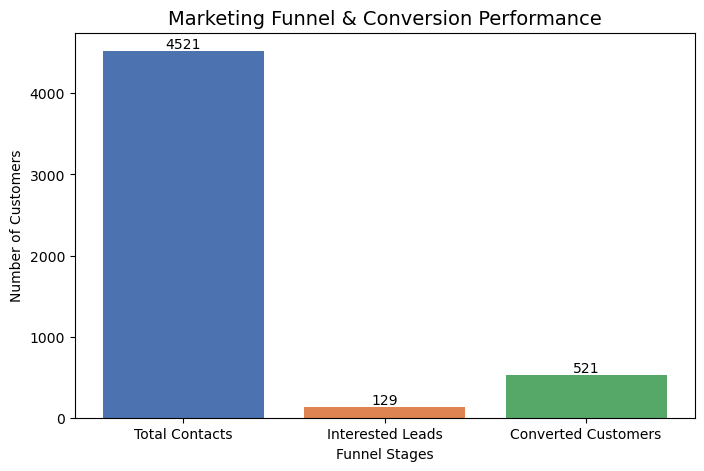

In [35]:
stages = ['Total Contacts', 'Interested Leads', 'Converted Customers']
values = [total_contacts, interested_leads, converted_customers]

colors = ['#4C72B0', '#DD8452', '#55A868']  # professional palette

plt.figure(figsize=(8,5))
bars = plt.bar(stages, values, color=colors)

plt.title("Marketing Funnel & Conversion Performance", fontsize=14)
plt.xlabel("Funnel Stages")
plt.ylabel("Number of Customers")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        int(height),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()



## Channel-wise Performance Analysis

This analysis compares conversion performance across different customer contact channels.


In [31]:
df.groupby('contact')['y'].mean().sort_values(ascending=False)


contact
telephone    0.146179
cellular     0.143646
unknown      0.046073
Name: y, dtype: float64

## Job-wise Conversion Analysis

This section analyzes which job categories have higher conversion rates.


In [32]:
job_conv = df.groupby('job')['y'].mean().sort_values(ascending=False)
job_conv.head()


job
retired       0.234783
student       0.226190
unknown       0.184211
management    0.135191
housemaid     0.125000
Name: y, dtype: float64

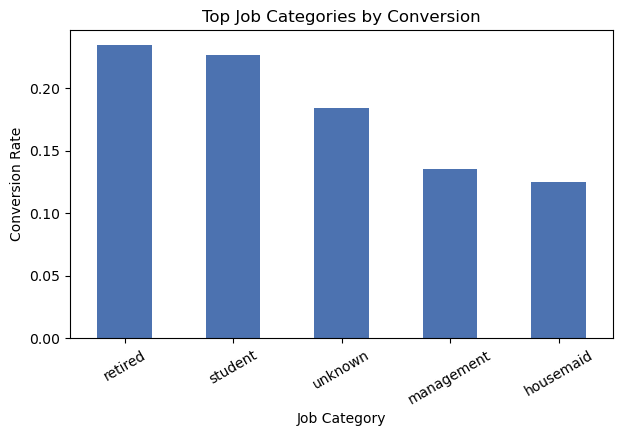

In [36]:
job_conv.head(5).plot(
    kind='bar',
    figsize=(7,4),
    color='#4C72B0',
    title='Top Job Categories by Conversion'
)

plt.xlabel("Job Category")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=30)
plt.show()



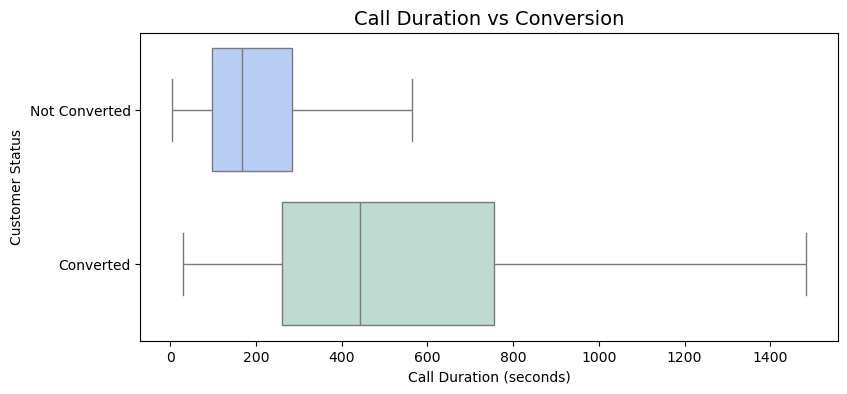

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,4))

sns.boxplot(
    data=df,
    x='duration',
    y=df['y'].map({0: 'Not Converted', 1: 'Converted'}),
    hue=df['y'].map({0: 'Not Converted', 1: 'Converted'}),
    palette={
        'Not Converted': '#AFCBFF',   # soft light blue
        'Converted': '#B8E0D2'        # soft light green
    },
    orient='h',
    showfliers=False,
    legend=False
)

plt.title("Call Duration vs Conversion", fontsize=14)
plt.xlabel("Call Duration (seconds)")
plt.ylabel("Customer Status")

plt.show()






## Key Insights

- A major drop-off occurs between total contacts and interested leads.
- Many customers convert without prior campaign success.
- Cellular contact channel shows better conversion performance.
- Longer call durations increase the likelihood of conversion.


## Recommendations

- Improve lead targeting to reduce early-stage drop-offs.
- Focus more on high-performing communication channels.
- Optimize call strategies to improve customer engagement.
- Retarget customers who previously showed interest.
